# Introduction

## Notebook Made by Colten Yeats with the help of AI

**AI Used:** ChatGPT-4o mini

**Prompt for generating this notebook:** Generate a downloadable .ipynb file with the following sections: "Introduction", "Data Context", "Load Libraries", "Load Data", "Wrangle Data", "Visualize Data", "Advanced Visualizations", "Machine Learning Practice", "Never Fraud", "k-Nearest Neighbors", "Evaluating the Models", "Comparing ML Models"

This notebook is designed to guide you through a complete data analysis and machine learning workflow. Each section will help build a comprehensive project.

## Data Context

Provide an overview of the dataset used, including its source, purpose, and any relevant background information.

## Import Libraries

**Prompt:** Make a Python notebook section titled "Import Libraries" and import pandas, seaborn, matplotlib.pyplot, train_test_split from sklearn.model_selection, StandardScaler from sklearn.preprocessing, KNeighborsClassifier from sklearn.neighbors, and confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, and f1_score from sklearn.metrics.

**AI Used:** ChatGPT-4o mini

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score 

## Load Data

**Prompt:** Can you write python code that describes the shape, amount of non-null values, and basic summary statistics within a pandas DataFrame named "transactions"?

**AI Used:** ChatGPT 4o-mini & Gemini 1.5 Flash

In [2]:
# Load Libraries
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load your dataset here
transactions = pd.read_csv('card_transdata.csv')
transactions.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


In [4]:
# Get the shape of the DataFrame (rows, columns)
shape = transactions.shape
print("Shape of the DataFrame:", shape)

Shape of the DataFrame: (999, 8)


In [5]:
# Get the number of non-null values in each column
non_null_counts = transactions.count()
print("Non-null values per column:\n", non_null_counts)

Non-null values per column:
 distance_from_home                999
distance_from_last_transaction    996
ratio_to_median_purchase_price    997
repeat_retailer                   992
used_chip                         995
used_pin_number                   997
online_order                      995
fraud                             999
dtype: int64


In [6]:
# Get basic summary statistics for numerical columns
numerical_summary = transactions.describe()
print("Summary statistics for numerical columns:\n", numerical_summary)

Summary statistics for numerical columns:
        distance_from_home  distance_from_last_transaction  \
count          999.000000                      996.000000   
mean            26.876607                        5.437319   
std             63.899697                       35.668094   
min              0.104184                        0.001448   
25%              3.990543                        0.306441   
50%             10.340321                        0.958539   
75%             25.393952                        3.137259   
max            965.910612                      990.070315   

       ratio_to_median_purchase_price  repeat_retailer   used_chip  \
count                      997.000000       992.000000  995.000000   
mean                         1.655069         0.892137    0.313568   
std                          2.351386         0.310364    0.464176   
min                          0.016933         0.000000    0.000000   
25%                          0.468123         1.000000   

In [7]:
# Get basic information about the DataFrame (including data types)
info = transactions.info()
print("DataFrame information:\n", info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB
DataFrame information:
 None


## Wrangle Data

**Prompt:** Please write a python notebook section where you check for any null values in "transactions". Afterwards, make a new pandas DataFrame called "clean_transactions" and put a copied version of "transactions" with no null values within it. Then, print the shape and head of "clean_transactions"

**AI Used:** Gemini 1.5 Flash

In [8]:
# Check for null values
null_values = transactions.isnull().sum()
print("Null values per column:\n", null_values)

Null values per column:
 distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


In [9]:
# Create a new DataFrame without null values
clean_transactions = transactions.dropna()

# Print the shape of the cleaned DataFrame
print("Shape of clean_transactions:", clean_transactions.shape)

Shape of clean_transactions: (977, 8)


In [10]:
# Print the head of the cleaned DataFrame
clean_transactions.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0


## Visualize Data

**Prompt:** Make python code for a count plot titled "Card Fraud Distribution" using a DataFrame named "clean_transactions" and the column "fraud" for the x-axis.

**AI Used:** ChatGPT-4o mini

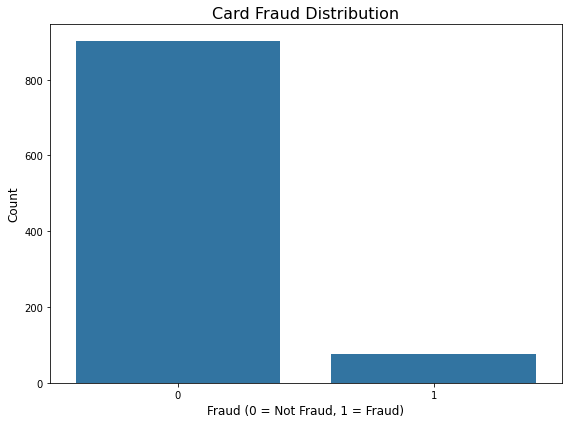

In [11]:
# Basic visualizations to understand the dataset.
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_transactions, x='fraud')

# Add title and labels
plt.title("Card Fraud Distribution", fontsize=16)
plt.xlabel("Fraud (0 = Not Fraud, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Make python code for a count plot titled "PIN Usage Distribution" using a DataFrame named "clean_transactions" and the column "used_pin" for the x-axis.

**AI Used:** ChatGPT-4o mini

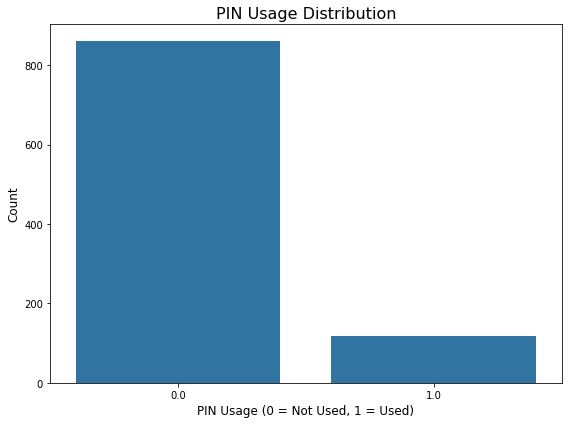

In [12]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_transactions, x='used_pin_number')

# Add title and labels
plt.title("PIN Usage Distribution", fontsize=16)
plt.xlabel("PIN Usage (0 = Not Used, 1 = Used)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Make python code for a count plot titled "Repeat Retailer Distribution" using a DataFrame named "clean_transactions" and the column "repeat_retailer" for the x-axis.

**AI Used:** ChatGPT-4o mini

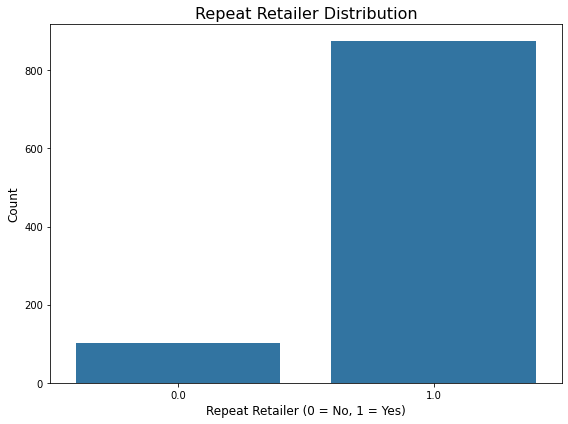

In [13]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_transactions, x='repeat_retailer')

# Add title and labels
plt.title("Repeat Retailer Distribution", fontsize=16)
plt.xlabel("Repeat Retailer (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Make python code for a count plot titled "Chip Usage Distribution" using a DataFrame named "clean_transactions" and the column "used_chip" for the x-axis.

**AI Used:** ChatGPT-4o mini

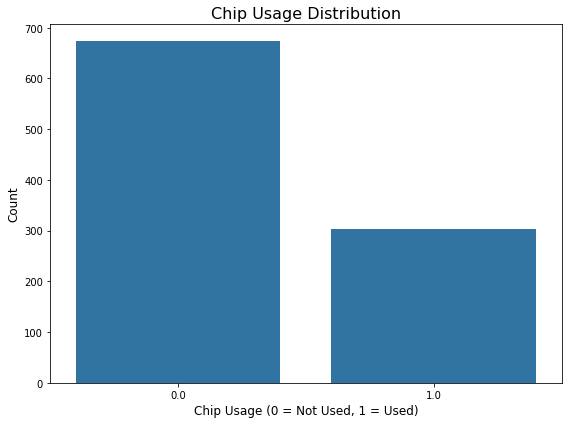

In [14]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_transactions, x='used_chip')

# Add title and labels
plt.title("Chip Usage Distribution", fontsize=16)
plt.xlabel("Chip Usage (0 = Not Used, 1 = Used)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Using seaborn, make python code for a histogram with 30 bins titled "Distance from Last Transaction Distribution" using a DataFrame named "clean_transactions" and the column "distance_From_last_transaction" for the x-axis.

**AI Used:** ChatGPT-4o mini

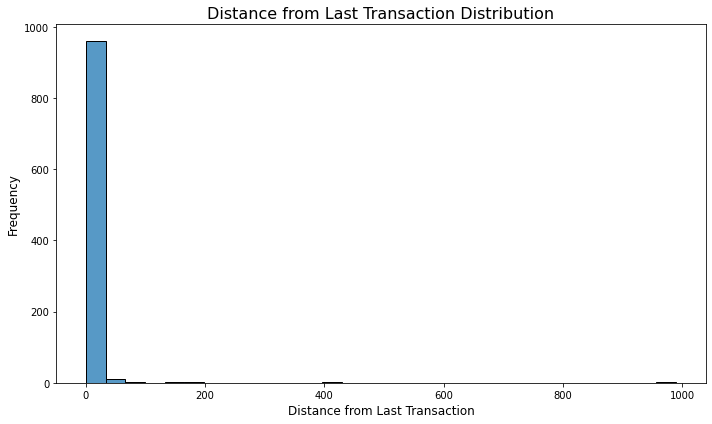

In [15]:
# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_transactions, x='distance_from_last_transaction', bins=30, kde=False)

# Add title and labels
plt.title("Distance from Last Transaction Distribution", fontsize=16)
plt.xlabel("Distance from Last Transaction", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Using seaborn, make python code for a histogram with 30 bins titled "Ratio to Median Purchase Price Distribution" using a DataFrame named "clean_transactions" and the column "ratio_to_median_purchase_price" for the x-axis.

**AI Used:** ChatGPT-4o mini

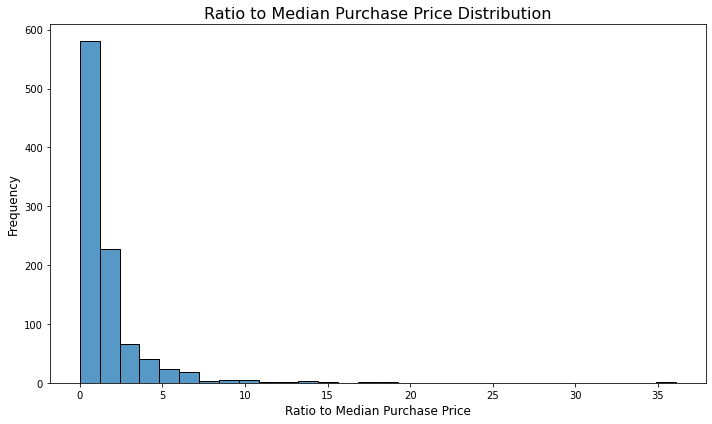

In [16]:
# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_transactions, x='ratio_to_median_purchase_price', bins=30, kde=False)

# Add title and labels
plt.title("Ratio to Median Purchase Price Distribution", fontsize=16)
plt.xlabel("Ratio to Median Purchase Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Prompt:** Using seaborn, make python code for a histogram with 30 bins titled "Distance From Home Distribution" using a DataFrame named "clean_transactions" and the column "distance_from_home" for the x-axis.

**AI Used:** ChatGPT-4o mini

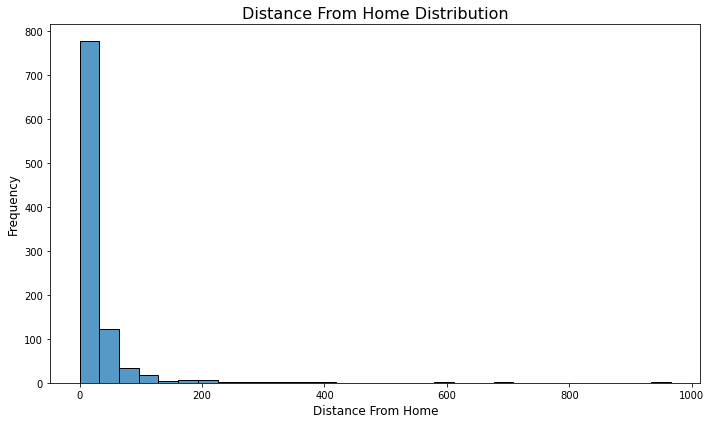

In [17]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(clean_transactions['distance_from_home'], bins=30, kde=False)

# Set the title and labels
plt.title("Distance From Home Distribution", fontsize=16)
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Advanced Visualizations

**Prompt:** Make python code for a count plot titled "Transactions with PIN vs Fraudulent Transactions" using a DataFrame named "clean_transactions" and the column "used_pin" for the x_axis and the column "fraud" as the hue. The palette should be green and red respectively. Add a legend titled "Fraud" with labels "Non-Fraudulent" and "Fraudulent" respectively.

**AI Used:** ChatGPT-4o mini

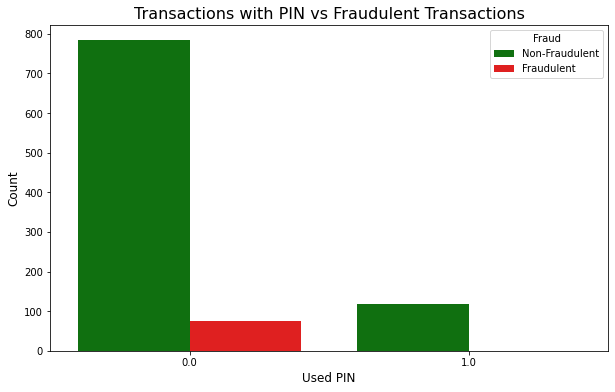

In [18]:
# Create complex or custom visualizations.
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='used_pin_number', hue='fraud', data=clean_transactions, palette={0: 'green', 1: 'red'})

# Set the title and labels
plt.title("Transactions with PIN vs Fraudulent Transactions", fontsize=16)
plt.xlabel("Used PIN", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Set the legend title and labels
plt.legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])

# Show the plot
plt.show()

**Prompt:** Make some python code to create a percentage plot that shows the percentage of 1s in the "fraud" column of a DataFrame named "transactions", grouped by the column "used_pin_number" using the .plot function. Use the colors green and red respectively to represent 0s and 1s found in this hypothetical DataFrame.

**AI Used:** ChatGPT-4o mini

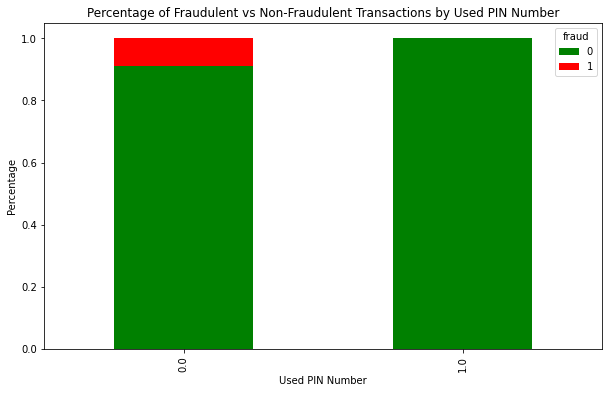

In [19]:
# Calculate the normalized fraud counts (percentages) grouped by 'used_pin_number'
fraud_counts = transactions.groupby('used_pin_number')['fraud'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the percentages as a stacked bar plot
fraud_counts.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Set the title and labels
plt.title("Percentage of Fraudulent vs Non-Fraudulent Transactions by Used PIN Number")
plt.xlabel("Used PIN Number")
plt.ylabel("Percentage")

# Show the plot
plt.show()

**Prompt:** Make python code for a count plot titled "Repeat Retailer vs Fraudulent Transactions" using a DataFrame named "clean_transactions" and the column "repeat_retailer" for the x_axis and the column "fraud" as the hue. The palette should be green and red respectively. Add a legend titled "Fraud" with labels "Non-Fraudulent" and "Fraudulent" respectively. Next, make some python code to create a percentage plot that shows the percentage of 1s in the "fraud" column of a DataFrame named "transactions", grouped by the column "repeat_retailer" using the .plot function. Use the colors green and red respectively to represent 0s and 1s found in this hypothetical DataFrame. Call this graph "Percentage of Fraudulent vs Non-Fraudulent Transactions by Repeat Retailers". Place both of these on their own individual subplot and side-by-side.

**AI Used:** ChatGPT-4o mini

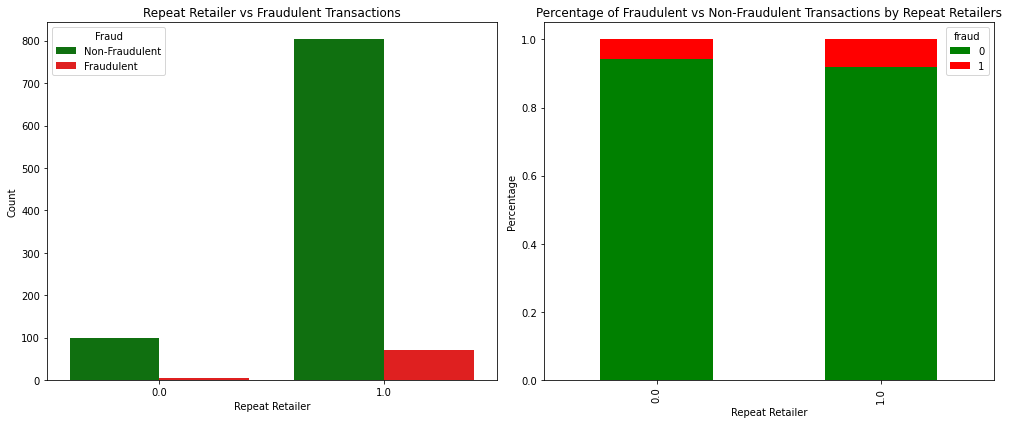

In [20]:
# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count Plot - "Repeat Retailer vs Fraudulent Transactions"
sns.countplot(x='repeat_retailer', hue='fraud', data=clean_transactions, palette={0: 'green', 1: 'red'}, ax=axes[0])

# Set the title, labels, and legend for the first plot
axes[0].set_title("Repeat Retailer vs Fraudulent Transactions")
axes[0].set_xlabel("Repeat Retailer")
axes[0].set_ylabel("Count")
axes[0].legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])

# Plot 2: Percentage Plot - "Percentage of Fraudulent vs Non-Fraudulent Transactions by Repeat Retailers"
# Calculate the normalized fraud counts (percentages) grouped by 'repeat_retailer'
fraud_counts = transactions.groupby('repeat_retailer')['fraud'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the percentages as a stacked bar plot
fraud_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[1])

# Set the title and labels for the second plot
axes[1].set_title("Percentage of Fraudulent vs Non-Fraudulent Transactions by Repeat Retailers")
axes[1].set_xlabel("Repeat Retailer")
axes[1].set_ylabel("Percentage")

# Show the plots
plt.tight_layout()  # Adjust the spacing between the plots
plt.show()

**Prompt:** Make python code for a count plot titled "Chip Usage vs Fraudulent Transactions" using a DataFrame named "clean_transactions" and the column "used_chip" for the x_axis and the column "fraud" as the hue. The palette should be green and red respectively. Add a legend titled "Fraud" with labels "Non-Fraudulent" and "Fraudulent" respectively. Next, make some python code to create a percentage plot that shows the percentage of 1s in the "fraud" column of a DataFrame named "transactions", grouped by the column "used_chip" using the .plot function. Use the colors green and red respectively to represent 0s and 1s found in this hypothetical DataFrame. Call this graph "Percentage of Fraudulent vs Non-Fraudulent Transactions by Chip Usage". Place both of these on their own individual subplot.

**AI Used:** ChatGPT-4o mini

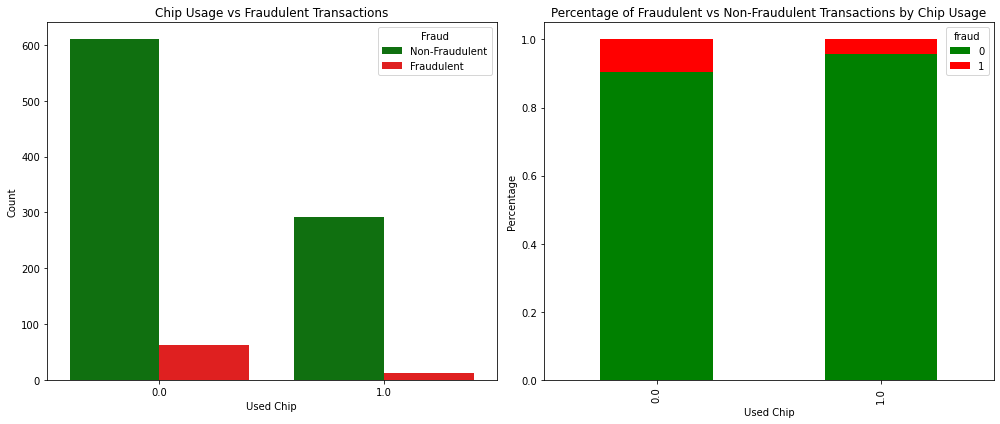

In [21]:
# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count Plot - "Chip Usage vs Fraudulent Transactions"
sns.countplot(x='used_chip', hue='fraud', data=clean_transactions, palette={0: 'green', 1: 'red'}, ax=axes[0])

# Set the title, labels, and legend for the first plot
axes[0].set_title("Chip Usage vs Fraudulent Transactions")
axes[0].set_xlabel("Used Chip")
axes[0].set_ylabel("Count")
axes[0].legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])

# Plot 2: Percentage Plot - "Percentage of Fraudulent vs Non-Fraudulent Transactions by Chip Usage"
# Calculate the normalized fraud counts (percentages) grouped by 'used_chip'
fraud_counts = transactions.groupby('used_chip')['fraud'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the percentages as a stacked bar plot
fraud_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[1])

# Set the title and labels for the second plot
axes[1].set_title("Percentage of Fraudulent vs Non-Fraudulent Transactions by Chip Usage")
axes[1].set_xlabel("Used Chip")
axes[1].set_ylabel("Percentage")

# Show the plots
plt.tight_layout()  # Adjust the spacing between the plots
plt.show()

**Prompt:** Make python code for a count plot titled "Online Order vs Fraudulent Transactions" using a DataFrame named "clean_transactions" and the column "online_order" for the x_axis and the column "fraud" as the hue. The palette should be green and red respectively. Add a legend titled "Fraud" with labels "Non-Fraudulent" and "Fraudulent" respectively. Next, make some python code to create a percentage plot that shows the percentage of 1s in the "fraud" column of a DataFrame named "transactions", grouped by the column "online_order" using the .plot function. Use the colors green and red respectively to represent 0s and 1s found in this hypothetical DataFrame. Call this graph "Percentage of Fraudulent vs Non-Fraudulent Transactions by Online Ordering". Place both of these on their own individual subplot.

**AI Used:** ChatGPT-4o mini

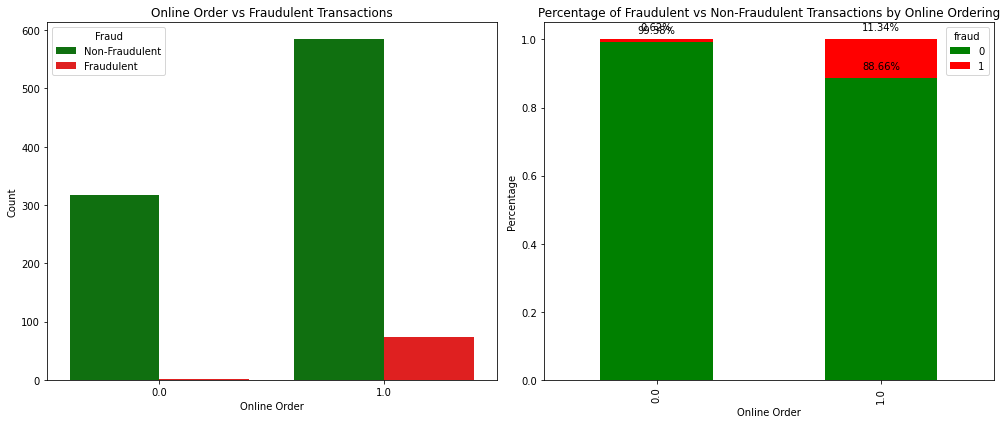

In [22]:
# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count Plot - "Online Order vs Fraudulent Transactions"
sns.countplot(x='online_order', hue='fraud', data=clean_transactions, palette={0: 'green', 1: 'red'}, ax=axes[0])

# Set the title, labels, and legend for the first plot
axes[0].set_title("Online Order vs Fraudulent Transactions")
axes[0].set_xlabel("Online Order")
axes[0].set_ylabel("Count")
axes[0].legend(title="Fraud", labels=["Non-Fraudulent", "Fraudulent"])

# Plot 2: Percentage Plot - "Percentage of Fraudulent vs Non-Fraudulent Transactions by Online Ordering"
# Calculate the normalized fraud counts (percentages) grouped by 'online_order'
fraud_counts = transactions.groupby('online_order')['fraud'].value_counts(normalize=True).unstack(fill_value=0)

# Plot the percentages as a stacked bar plot
fraud_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[1])

# Set the title and labels for the second plot
axes[1].set_title("Percentage of Fraudulent vs Non-Fraudulent Transactions by Online Ordering")
axes[1].set_xlabel("Online Order")
axes[1].set_ylabel("Percentage")

# Add percentage labels on the bars
for i, (index, row) in enumerate(fraud_counts.iterrows()):
    non_fraud_percentage = row[0] * 100
    fraud_percentage = row[1] * 100
    axes[1].text(i, row[0] + 0.02, f'{non_fraud_percentage:.2f}%', ha='center', va='bottom')
    axes[1].text(i, row[0] + row[1] + 0.02, f'{fraud_percentage:.2f}%', ha='center', va='bottom')

# Show the plots
plt.tight_layout()  # Adjust the spacing between the plots
plt.show()

### Bivariate Visualizations

**Prompt:** Make some python code to create a scatterplot titled "Distance From Home Vs Ratio To Median Purchase Price" using DataFrame "clean_transactions" and assigning column "distance_from_home" as the x-axis and column "ratio_to_median_purchase_price" as the y-axis. Additionally, assign column "fraud" to the hue variable and make it so that "0" values are green and "1" values are red. Make the graph title font-size 10.

**AI Used:** ChatGPT-4o mini

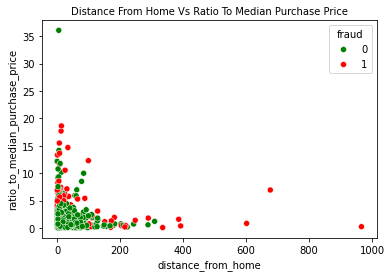

In [23]:
# Create the scatter plot
sns.scatterplot(x='distance_from_home', 
                y='ratio_to_median_purchase_price', 
                hue='fraud', 
                data=clean_transactions, 
                palette={0: 'green', 1: 'red'})

# Set the title and font size for the title
plt.title("Distance From Home Vs Ratio To Median Purchase Price", fontsize=10)

# Show the plot
plt.show()

**Prompt:** Make some python code to create a scatterplot titled "Distance From Home Vs Distance from Last Transaction" using DataFrame "clean_transactions" and assigning column "distance_from_home" as the x-axis and column "distance_from_last_transaction" as the y-axis. Additionally, assign column "fraud" to the hue variable and make it so that "0" values are green and "1" values are red. Make the graph title font-size 10.

**AI Used:** ChatGPT-4o mini

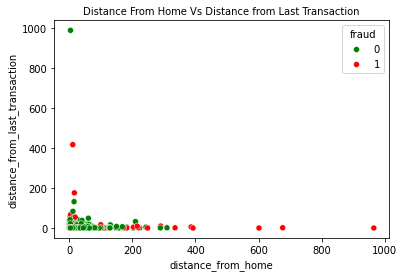

In [24]:
# Create the scatter plot
sns.scatterplot(x='distance_from_home', 
                y='distance_from_last_transaction', 
                hue='fraud', 
                data=clean_transactions, 
                palette={0: 'green', 1: 'red'})

# Set the title and font size for the title
plt.title("Distance From Home Vs Distance from Last Transaction", fontsize=10)

# Show the plot
plt.show()

**Prompt:** Make some python code to create a scatterplot titled "Distance From Last Transaction Vs Ratio to Median Purchase Price" using DataFrame "clean_transactions" and assigning column "distance_from_last_transaction" as the x-axis and column "ratio_to_median_purchase_price" as the y-axis. Additionally, assign column "fraud" to the hue variable and make it so that "0" values are green and "1" values are red. Make the graph title font-size 10.

**AI Used:** ChatGPT-4o mini

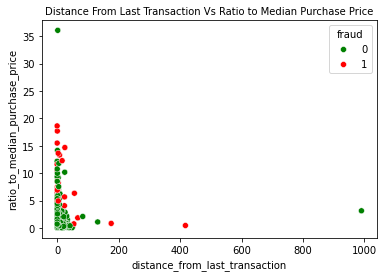

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
sns.scatterplot(x='distance_from_last_transaction', 
                y='ratio_to_median_purchase_price', 
                hue='fraud', 
                data=clean_transactions, 
                palette={0: 'green', 1: 'red'})

# Set the title and font size for the title
plt.title("Distance From Last Transaction Vs Ratio to Median Purchase Price", fontsize=10)

# Show the plot
plt.show()

## Machine Learning Practice

**Prompt:** I want to perform a train_test_split on the data within a hypothetical DataFrame named "clean_transactions". Can you perform a split given that variable "X" will contain the whole "clean_transactions" dataset except for the "fraud" column and variable "y" will consist of only the "fraud" column of "clean_transactions"? Also, please use stratify.

**AI Used:** ChatGPT-4o mini

In [26]:
# Define X (features) and y (target)
X = clean_transactions.drop(columns='fraud')  # Exclude the 'fraud' column
y = clean_transactions['fraud']  # Select the 'fraud' column

# Perform the train-test split (80% training, 20% testing), using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (781, 7)
X_test shape: (196, 7)
y_train shape: (781,)
y_test shape: (196,)


### Never Fraud

**Prompt:** Make some Python code to make a simple Never Fraud model. Then, print the first 100 predictions.

**AI Used:** ChatGPT-4o mini

In [27]:
from sklearn.dummy import DummyClassifier

# Initialize the DummyClassifier to always predict '0' (Never Fraud)
model_nf = DummyClassifier(strategy="constant", constant=0)

# Fit the model on the training data (though it won't actually learn)
model_nf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nf = model_nf.predict(X_test)

# Print the first 100 predictions
print(f'First 100 Predictions: {y_pred_nf[:100]}')

First 100 Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### k-Nearest Neighbors

**Prompt:** Make some Python code to make a simple k-Nearest Neighbors model and set k to 3. Then, print the first 100 predictions.

**AI Used:** ChatGPT-4o mini

In [28]:
# Initialize the k-NN classifier with k=3 (3 nearest neighbors)
model_knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Print the first 100 predictions
print(f'First 100 Predictions: {y_pred_knn[:100]}')

First 100 Predictions: [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


## Evaluating the Models

**Prompt:** Make some python code to create a confusion matrix using the variables "y_test" and "y_pred_nf". Then, make a heat map out of the confusion matrix and make the color mapping all reds. Make the title of this heat map "Never Fraud Confusion Matrix" and name the x-axis "Actual" and the y-axis "Predicted". Show this matrix and print the classification report of it.

**AI Used:** ChatGPT-4o mini

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       0.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.46      0.50      0.48       196
weighted avg       0.85      0.92      0.89       196



/home/jupyter-cyeats/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-cyeats/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-cyeats/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


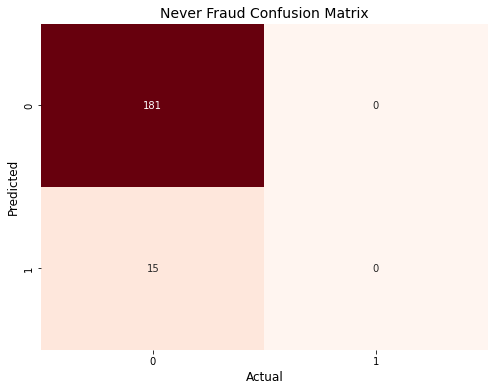

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nf)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nf))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)

# Add titles and labels
plt.title("Never Fraud Confusion Matrix", fontsize=14)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

# Display the plot
plt.show()

**Prompt:** Make some python code to create a confusion matrix using the variables "y_test" and "y_pred_knn". Then, make a heat map out of the confusion matrix and make the color mapping all blues. Make the title of this heat map "k-Nearest Neighbors Confusion Matrix" and name the x-axis "Actual" and the y-axis "Predicted". Show this matrix and print the classification report of it.

**AI Used:** ChatGPT-4o mini

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       181
           1       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



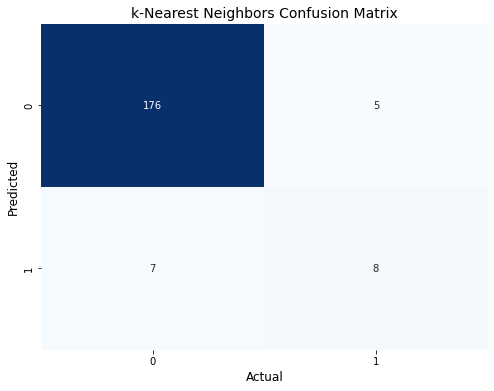

In [30]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add titles and labels
plt.title("k-Nearest Neighbors Confusion Matrix", fontsize=14)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)

# Display the plot
plt.show()

## Comparing ML Models

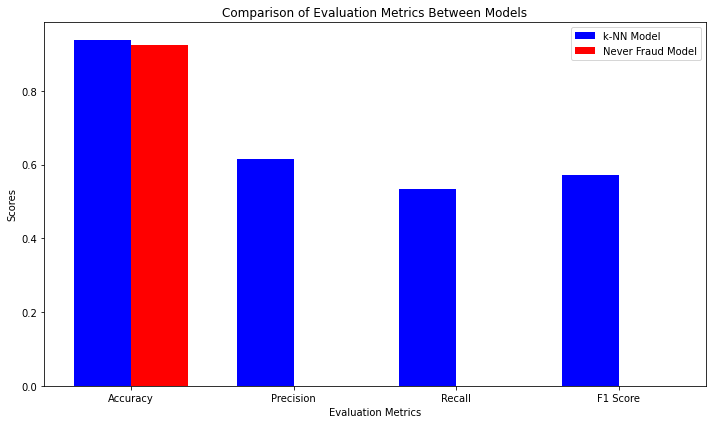

In [33]:
# Function to compute evaluation metrics and return them as a dictionary
def evaluate_model(y_true, y_pred):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
    }
    return metrics

# Evaluate the k-NN model
knn_metrics = evaluate_model(y_test, y_pred_knn)

# Evaluate the Never Fraud model
nf_metrics = evaluate_model(y_test, y_pred_nf)

# Store metrics in variables
knn_accuracy = knn_metrics["Accuracy"]
knn_precision = knn_metrics["Precision"]
knn_recall = knn_metrics["Recall"]
knn_f1_score = knn_metrics["F1 Score"]

nf_accuracy = nf_metrics["Accuracy"]
nf_precision = nf_metrics["Precision"]
nf_recall = nf_metrics["Recall"]
nf_f1_score = nf_metrics["F1 Score"]

# Prepare data for plotting
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
knn_values = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
nf_values = [nf_accuracy, nf_precision, nf_recall, nf_f1_score]

# Plot the metrics
x = np.arange(len(metric_names))  # X-axis positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_knn = ax.bar(x - width/2, knn_values, width, label='k-NN Model', color='blue')
bars_nf = ax.bar(x + width/2, nf_values, width, label='Never Fraud Model', color='red')

# Add labels, title, and legend
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Evaluation Metrics Between Models")
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()